In [19]:
import sys, os
import pandas as pd
import numpy as np

from rdkit import Chem

sys.path.append('../../Woodward_Fieser_Rules-main/src/')
import chromopredict as cp

In [20]:
def unpack_data(df, full=False):
    # Constants
    HARTREE_TO_EV = 27.2116
    EV_TO_NM = 1239.841984  # Planck constant * speed of light in nm·eV

    # Function to convert string to list of floats
    def parse_str_array(s):
        s = s.strip("[]").replace("\n", " ")  # Remove brackets and newline
        return [float(x) for x in s.split()]
    
    # Apply the parsing function
    df['eigenvalues'] = df['eigenvalues'].apply(parse_str_array)
    df['oscillator_strengths'] = df['oscillator_strengths'].apply(parse_str_array)

    # Now unpack and convert
    for i in range(10):
        # Extract raw eigenvalue
        df[f'E{i+1}'] = df['eigenvalues'].apply(lambda x: x[i]) * HARTREE_TO_EV
        df[f'f{i+1}'] = df['oscillator_strengths'].apply(lambda x: x[i])
        df[f'nm{i+1}'] = df[f'E{i+1}'].apply(lambda x: round(EV_TO_NM / x,1) if x != 0 else np.nan)

    if not full:    
        df = df.drop(columns=['eigenvalues', 'oscillator_strengths'])
    
    return df
    
def load_ref_data(path, category, func='b3lyp', full=True):

    df_raw = pd.read_csv(path)
    df_unpack = unpack_data(df_raw, full=full)
    df_unpack['solvent'] = None
    df_unpack['moltype'] = category

    if full:
        df_use = df_unpack
    else:
        df_use = df_unpack[['smiles', 'moltype', 'solvent', 'nm2']].rename(columns={'nm2': 'nm_'+str(func)})

    return df_use
    

In [21]:
df_aldehydes_mix1 = load_ref_data('opt_dft/data_b3lyp_aldehyde_mix_calc_178V195.csv', func='b3lyp', category='aldehyde', full=True)
df_aldehydes_mix2 = load_ref_data('opt_dft/data_b3lyp_aldehyde_mix_calc_195V195.csv', func='b3lyp', category='aldehyde', full=True)
df_aldehydes_mono = load_ref_data('opt_dft/data_b3lyp_aldehyd_mono_calc_36v36.csv', func='b3lyp', category='aldehyde', full=True)

df_aldehydes = pd.concat([df_aldehydes_mix1, df_aldehydes_mix2, df_aldehydes_mono], axis=0)
df_aldehydes_clean = df_aldehydes.drop_duplicates(subset='smiles')
df_aldehydes_clean.count()


smiles                         216
xyz                            216
eigenvalues                    216
eigenvectors_distributed       216
electric_transition_dipoles    216
velocity_transition_dipoles    216
magnetic_transition_dipoles    216
oscillator_strengths           216
rotatory_strengths             216
excitation_details             216
number_of_states               216
nto_lambdas                    216
E1                             216
f1                             216
nm1                            216
E2                             216
f2                             216
nm2                            216
E3                             216
f3                             216
nm3                            216
E4                             216
f4                             216
nm4                            216
E5                             216
f5                             216
nm5                            216
E6                             216
f6                  

In [22]:
df_ketones_mix1 = load_ref_data('opt_dft/data_b3lyp_ketones_mix_calc_54V195.csv', func='b3lyp', category='ketone', full=True)
df_ketones_mix2 = load_ref_data('opt_dft/data_b3lyp_ketones_mix_calc_124V195.csv', func='b3lyp', category='ketone', full=True)
df_ketones_mix3 = load_ref_data('opt_dft/data_b3lyp_ketones_mix_calc_195V195.csv', func='b3lyp', category='ketone', full=True)
df_ketones_mono = load_ref_data('opt_dft/data_b3lyp_keton_mono_calc_36v36.csv', func='b3lyp', category='ketone', full=True)

df_ketones = pd.concat([df_ketones_mix1, df_ketones_mix2, df_ketones_mix3, df_ketones_mono], axis=0)
df_ketones_clean = df_ketones.drop_duplicates(subset='smiles')

df_ketones_clean.count()

smiles                         216
xyz                            216
eigenvalues                    216
eigenvectors_distributed       216
electric_transition_dipoles    216
velocity_transition_dipoles    216
magnetic_transition_dipoles    216
oscillator_strengths           216
rotatory_strengths             216
excitation_details             216
number_of_states               216
nto_lambdas                    216
E1                             216
f1                             216
nm1                            216
E2                             216
f2                             216
nm2                            216
E3                             216
f3                             216
nm3                            216
E4                             216
f4                             216
nm4                            216
E5                             216
f5                             216
nm5                            216
E6                             216
f6                  

In [23]:
df_acids_mix1 = load_ref_data('opt_dft/data_b3lyp_acids_mix_calc_72v195.csv', func='b3lyp', category='acid', full=True)
df_acids_mix2 = load_ref_data('opt_dft/data_b3lyp_acids_mix_calc_195v195.csv', func='b3lyp', category='acid', full=True)
df_acids_mono = load_ref_data('opt_dft/data_b3lyp_acid_mono_calc_36v36.csv', func='b3lyp', category='acid', full=True)

df_acids = pd.concat([df_acids_mix1, df_acids_mix2, df_acids_mono], axis=0)
df_acids_clean = df_acids.drop_duplicates(subset='smiles')
df_acids_clean.count()

smiles                         216
xyz                            216
eigenvalues                    216
eigenvectors_distributed       216
electric_transition_dipoles    216
velocity_transition_dipoles    216
magnetic_transition_dipoles    216
oscillator_strengths           216
rotatory_strengths             216
excitation_details             216
number_of_states               216
nto_lambdas                    216
E1                             216
f1                             216
nm1                            216
E2                             216
f2                             216
nm2                            216
E3                             216
f3                             216
nm3                            216
E4                             216
f4                             216
nm4                            216
E5                             216
f5                             216
nm5                            216
E6                             216
f6                  

In [24]:
df_5r_mix1 = load_ref_data('opt_dft/data_b3lyp_5R_mix_calc_20v20.csv', func='b3lyp', category='cyclopentenone', full=True)
df_5r_mono = load_ref_data('opt_dft/data_b3lyp_5R_mono_calc_16v16.csv', func='b3lyp', category='cyclopentenone', full=True)

df_5r = pd.concat([df_5r_mix1, df_5r_mono], axis=0)
df_5r_clean = df_5r.drop_duplicates(subset='smiles')
df_5r_clean.count()


smiles                         36
xyz                            36
eigenvalues                    36
eigenvectors_distributed       36
electric_transition_dipoles    36
velocity_transition_dipoles    36
magnetic_transition_dipoles    36
oscillator_strengths           36
rotatory_strengths             36
excitation_details             36
number_of_states               36
nto_lambdas                    36
E1                             36
f1                             36
nm1                            36
E2                             36
f2                             36
nm2                            36
E3                             36
f3                             36
nm3                            36
E4                             36
f4                             36
nm4                            36
E5                             36
f5                             36
nm5                            36
E6                             36
f6                             36
nm6           

In [25]:
df_6r_mix1 = load_ref_data('opt_dft/data_b3lyp_6R_mix_calc_20v20.csv', func='b3lyp', category='cyclohexenone', full=True)
df_6r_mono = load_ref_data('opt_dft/data_b3lyp_6R_mono_calc_16v16.csv', func='b3lyp', category='cyclohexenone', full=True)

df_6r = pd.concat([df_6r_mix1, df_6r_mono], axis=0)
df_6r_clean = df_6r.drop_duplicates(subset='smiles')
df_6r_clean.count()


smiles                         36
xyz                            36
eigenvalues                    36
eigenvectors_distributed       36
electric_transition_dipoles    36
velocity_transition_dipoles    36
magnetic_transition_dipoles    36
oscillator_strengths           36
rotatory_strengths             36
excitation_details             36
number_of_states               36
nto_lambdas                    36
E1                             36
f1                             36
nm1                            36
E2                             36
f2                             36
nm2                            36
E3                             36
f3                             36
nm3                            36
E4                             36
f4                             36
nm4                            36
E5                             36
f5                             36
nm5                            36
E6                             36
f6                             36
nm6           

In [26]:
df_all = pd.concat([df_aldehydes_clean, df_acids_clean, df_ketones_clean, df_5r_clean, df_6r_clean], axis=0) #, df_ketones_mono, df_acids_mono], axis=0)
df_all.head(n=5)

,smiles,xyz,eigenvalues,eigenvectors_distributed,electric_transition_dipoles,velocity_transition_dipoles,magnetic_transition_dipoles,oscillator_strengths,rotatory_strengths,excitation_details,...,f8,nm8,E9,f9,nm9,E10,f10,nm10,solvent,moltype
0,O=C/C(C)=C(C)\OC,18\n\nO -1.115516383710 1....,"[0.12850828, 0.17618473, 0.2132034, 0.22527962...",{0: <veloxchem.distributedarray.DistributedArr...,[[-0.03944571 -0.05347719 0.02006807]\n [-0.2...,[[-0.0155567 -0.02126592 0.00913896]\n [-0.2...,[[ 0.30348165 -0.24129724 -0.04703276]\n [-0.0...,"[0.000412811504, 0.310617264, 0.000318451709, ...",[-0.00923782 -0.81820218 0.33102016 0.048976...,"[['HOMO-1 -> LUMO 0.9913'], ['HOMO ...",...,0.000364,176.6,7.063348,0.000873,175.5,7.287513,0.000760,170.1,None,aldehyde
1,O=C/C(C)=C(C)\Cl,14\n\nO 0.932682384035 -3....,"[0.12285767, 0.1774239, 0.19891298, 0.23860703...",{0: <veloxchem.distributedarray.DistributedArr...,[[-3.07190846e-02 -3.70774101e-02 -3.34449003e...,[[-1.05656753e-02 -1.28759651e-02 -1.13534042e...,[[ 2.25691011e-01 -2.67207011e-01 9.18681487e...,"[0.000281504421, 0.2258415, 1.66286206e-06, 0....",[ 0.00610708 0.67400739 -0.14535134 0.119935...,"[['HOMO -> LUMO 0.9911'], ['HOMO-1...",...,0.000284,180.9,6.947685,0.085715,178.5,7.211957,0.000739,171.9,None,aldehyde
2,O=C/C(C)=C(C)\Br,14\n\nO -0.497214704539 -0....,"[0.12085631, 0.16930835, 0.17764709, 0.2079390...",{0: <veloxchem.distributedarray.DistributedArr...,[[-0.00726046 -0.05475572 0.01644812]\n [-1.1...,[[-0.00207174 -0.0194039 0.00549123]\n [-1.1...,[[ 0.11653195 0.07278413 0.30289554]\n [-0.1...,"[0.000267611568, 0.184160288, 1.39275385e-05, ...",[ 0.00450164 -0.8197429 0.42544518 0.303975...,"[['HOMO -> LUMO -0.9843'], ['HOMO-1...",...,0.008380,183.7,6.752793,0.003887,183.6,6.826875,0.000260,181.6,None,aldehyde
3,O=C/C(C)=C(C)\O,15\n\nO -0.028034224236 -3....,"[0.13098178, 0.18448538, 0.20705242, 0.2179558...",{0: <veloxchem.distributedarray.DistributedArr...,[[ 0.04915954 -0.01198538 0.02920393]\n [ 0.2...,[[ 0.01202366 -0.00292145 0.00715951]\n [ 0.2...,[[-0.18941374 -0.32315841 0.18615247]\n [-0.0...,"[0.00029804285, 0.265778479, 0.00197453943, 0....",[-0.00028112 0.00255555 -0.00164086 0.002926...,"[['HOMO-1 -> LUMO -0.9916'], ['HOMO ...",...,0.000010,167.4,7.488821,0.001417,165.6,7.504812,0.038250,165.2,None,aldehyde
4,O=C/C(C)=C/C,14\n\nO -1.220546209834 0....,"[0.13146346, 0.19019583, 0.24525743, 0.2559697...",{0: <veloxchem.distributedarray.DistributedArr...,[[ 0.00979036 -0.0457271 -0.01169138]\n [-0.0...,[[ 0.00505094 -0.0235818 -0.0060355 ]\n [-0.0...,[[-0.3837064 -0.05393665 -0.11026144]\n [-0.1...,"[0.000203637552, 0.251206342, 0.000222923127, ...",[-0.00031625 0.00781901 -0.0106645 0.000423...,"[['HOMO -> LUMO 0.9920'], ['HOMO-1...",...,0.088475,158.0,7.906710,0.001757,156.8,7.941853,0.000470,156.1,None,aldehyde


In [27]:
df_all.count()

smiles                         720
xyz                            720
eigenvalues                    720
eigenvectors_distributed       720
electric_transition_dipoles    720
velocity_transition_dipoles    720
magnetic_transition_dipoles    720
oscillator_strengths           720
rotatory_strengths             720
excitation_details             720
number_of_states               720
nto_lambdas                    720
E1                             720
f1                             720
nm1                            720
E2                             720
f2                             720
nm2                            720
E3                             720
f3                             720
nm3                            720
E4                             720
f4                             720
nm4                            720
E5                             720
f5                             720
nm5                            720
E6                             720
f6                  

In [28]:
df_all.to_csv('ds_enones_b3lyp_10states.csv')

In [29]:
def add_wf_predict(df):

    nm_wf = []
    img_wf = []
    contrib_wf = []

    nm_wfr = []
    img_wfr = []
    contrib_wfr = []
    
    nm_wfe = []
    img_wfe = []
    contrib_wfe = []
    
    for _, row in df.iterrows():
        smi = row['smiles']
        solv = row['solvent']
        # woodward
        nm, d_contrib, img = cp.predict(smi, solvent=None, verbose=True, draw=False, chromlib='woodward')
        nm_wf.append(nm)
        contrib_wf.append(d_contrib)
        img_wf.append(img)

        # woodward refine
        nm, d_contrib, img = cp.predict(smi, solvent=None, verbose=True, draw=False, chromlib='woodward_refine')
        nm_wfr.append(nm)
        contrib_wfr.append(d_contrib)
        img_wfr.append(img)
        
        # woodward extended
        nm, d_contrib, img = cp.predict(smi, solvent=None, verbose=True, draw=False, chromlib='woodward_extended')
        nm_wfe.append(nm)
        contrib_wfe.append(d_contrib)
        img_wfe.append(img)
        
        
    df['nm_wf'] = nm_wf
    df['nm_wfr'] = nm_wfr
    df['nm_wfe'] = nm_wfe
    
    df['contrib_wf'] = contrib_wf
    df['contrib_wfe'] = contrib_wfe
    df['contrib_wfe'] = contrib_wfe
    
    df['img_wf'] = img_wf
    df['img_wfr'] = img_wfr
    df['img_wfe'] = img_wfe


In [30]:
add_wf_predict(df_all)

array([[<Axes: title={'center': 'nm_b3lyp'}>,
        <Axes: title={'center': 'nm_wf'}>],
       [<Axes: title={'center': 'nm_wfr'}>,
        <Axes: title={'center': 'nm_wfe'}>]], dtype=object)

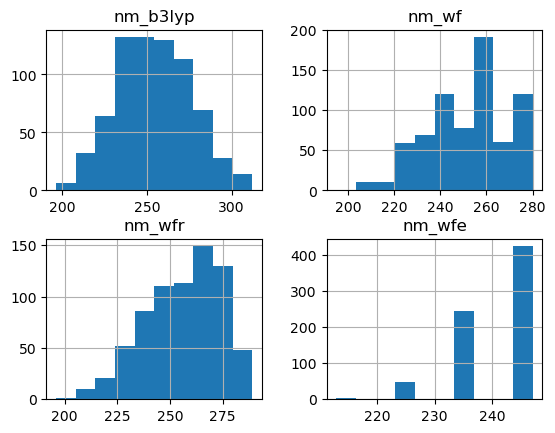

In [31]:
df_woodward = df_all[['smiles', 'moltype', 'solvent', 'nm2', 'nm_wf', 'nm_wfr', 'nm_wfe']].rename(columns={'nm2': 'nm_b3lyp'})
df_woodward.hist()

In [32]:
df_woodward.to_csv('ds_enones_b3lyp_woodward_1state.csv')